
<span style="font-size: 50px; color: #800080; font-weight: bold;" >  ניתוח נתוני גדוד 8111 חרבות ברזל</span>

<span style="font-size: 18px; color: #800080; font-weight: bold;">Omer Gean </span>

<span style="font-size: 20px; color: #800089; font-weight: bold;"> Introduction: </span>

The project data is based on real data collected during the "Iron Swords" war in Israel. The data is based on Reserve Battalion 8111 of the "Givati" and "Nahal" Brigades. The battalion operated in the southern region of Israel, participated in battles, deep inside Gaza, and protected civilians.

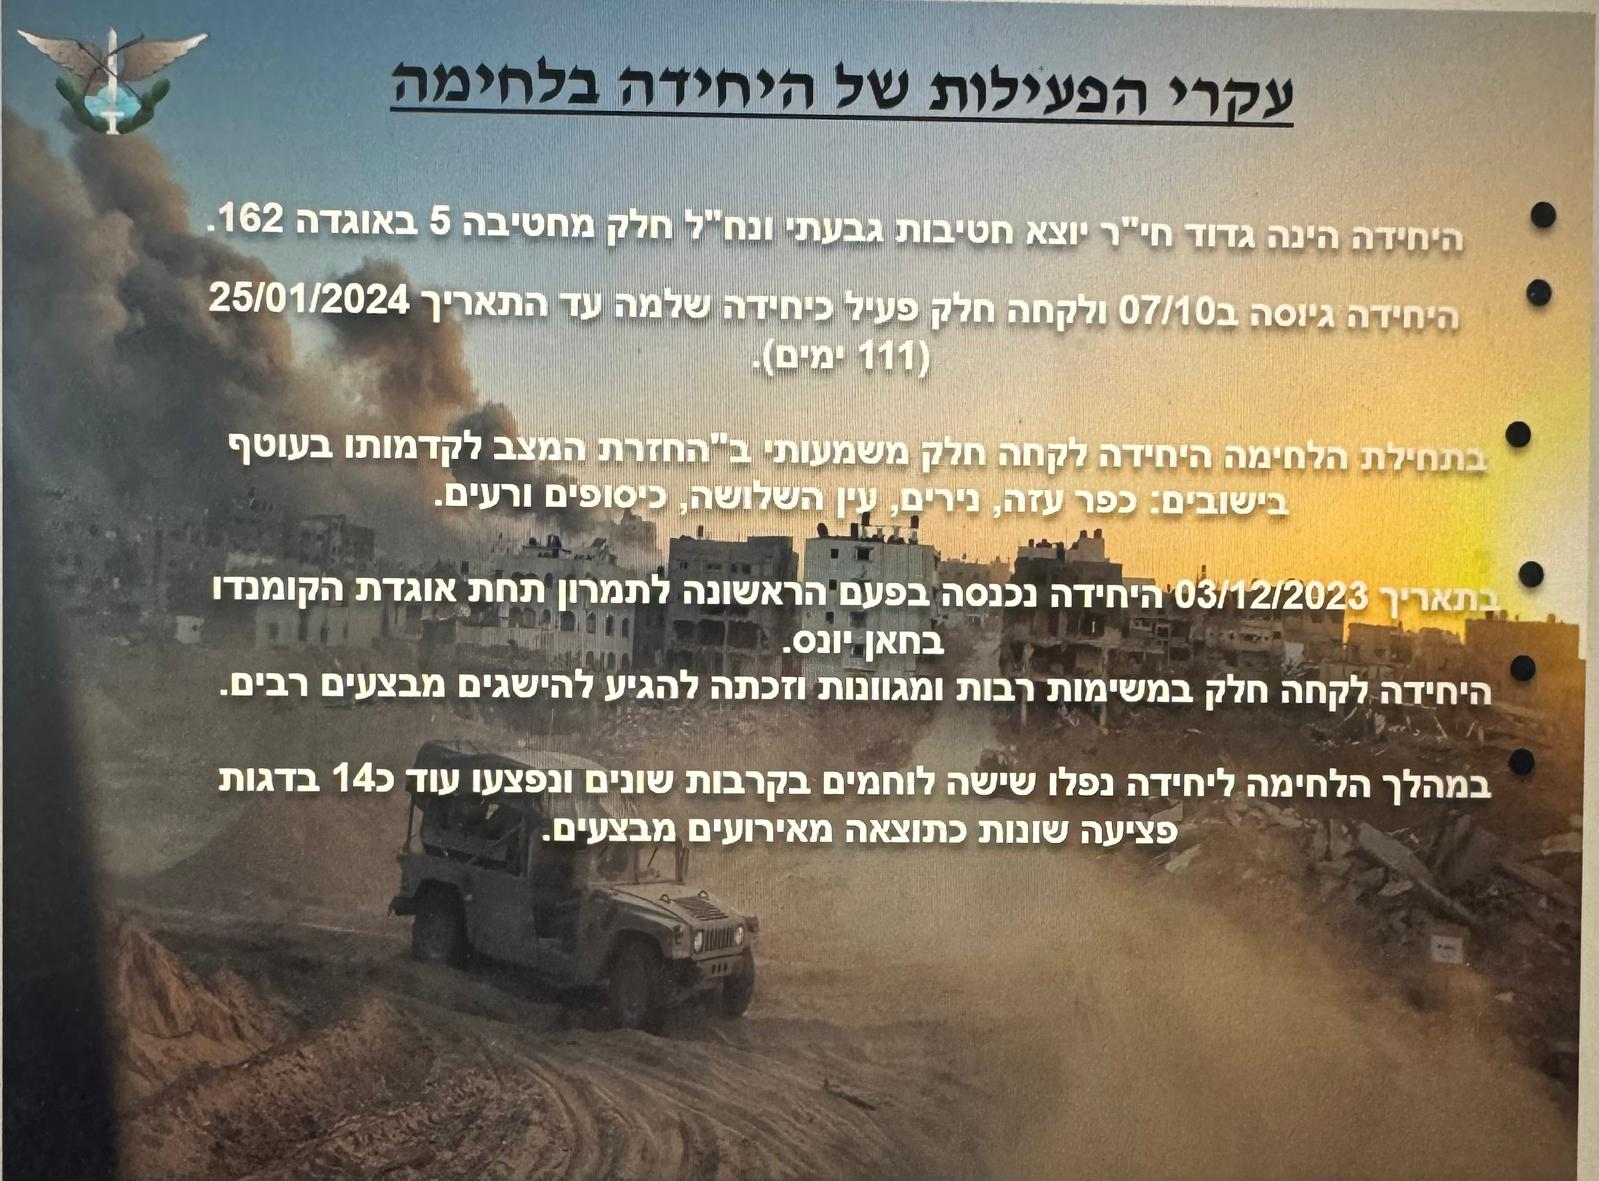

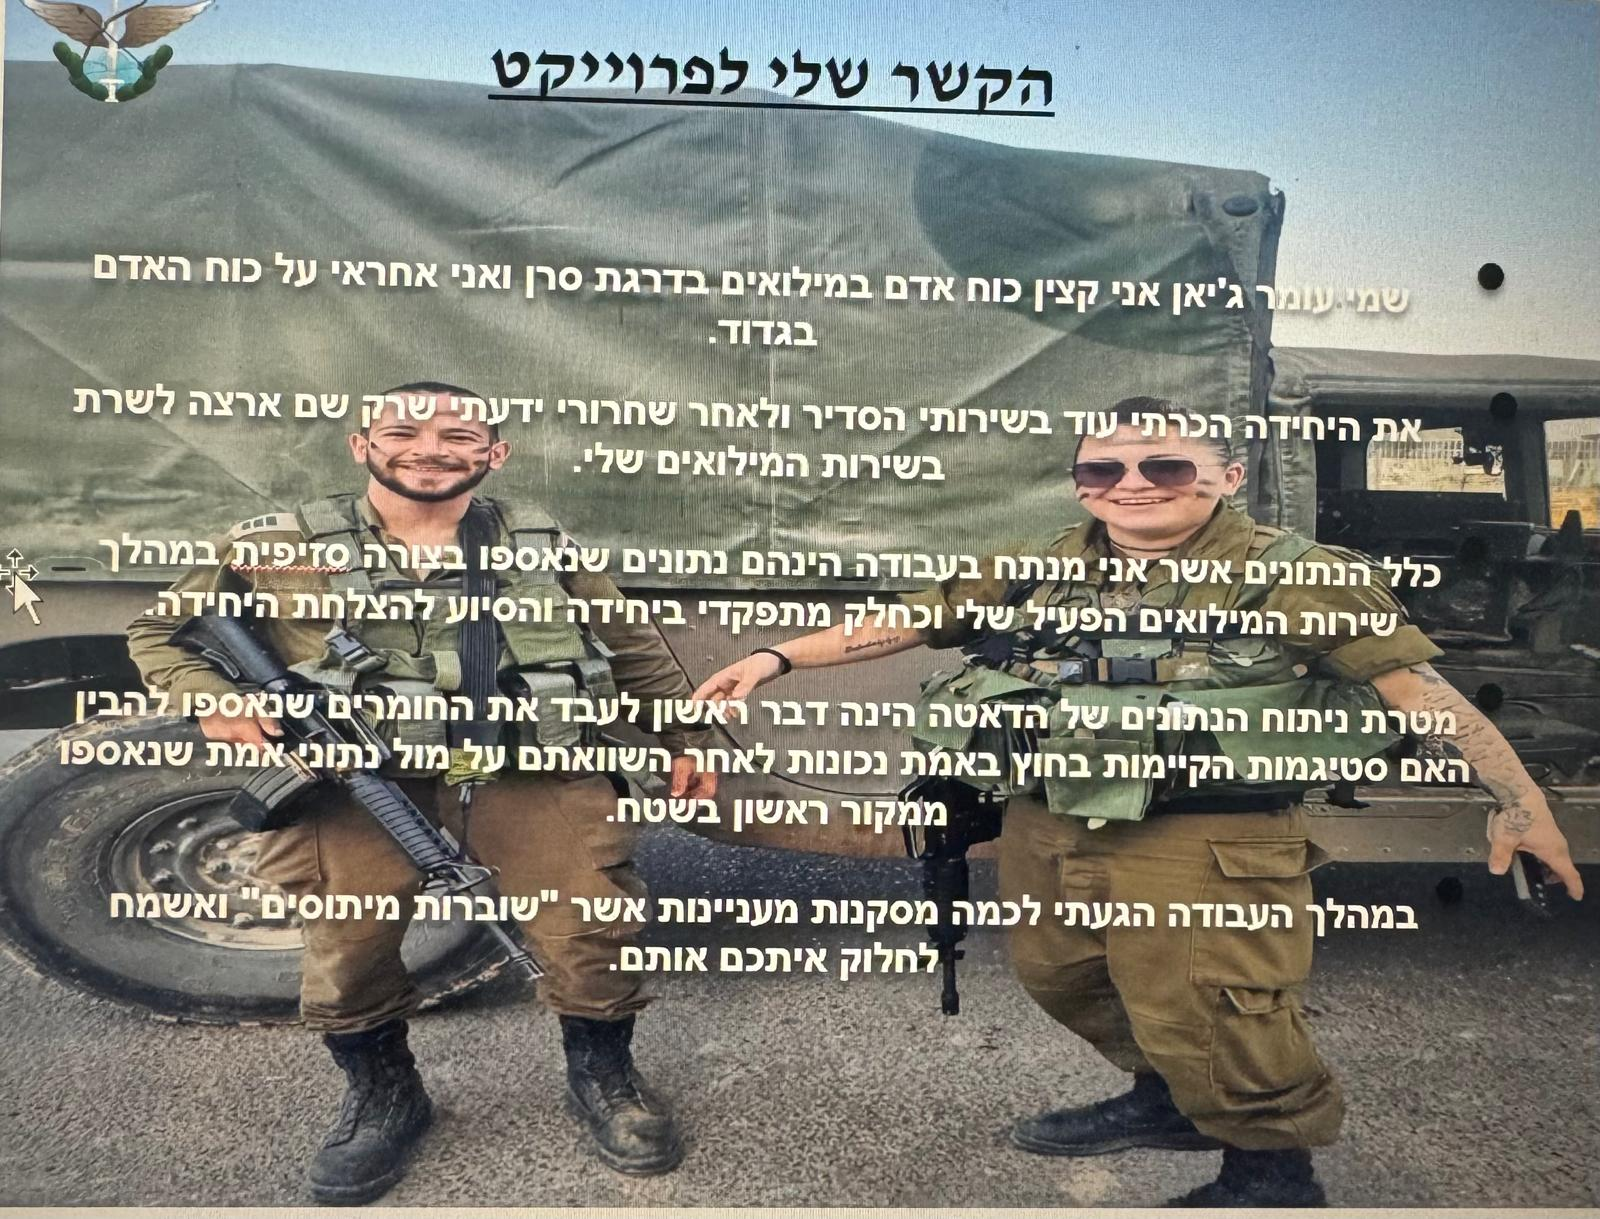

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

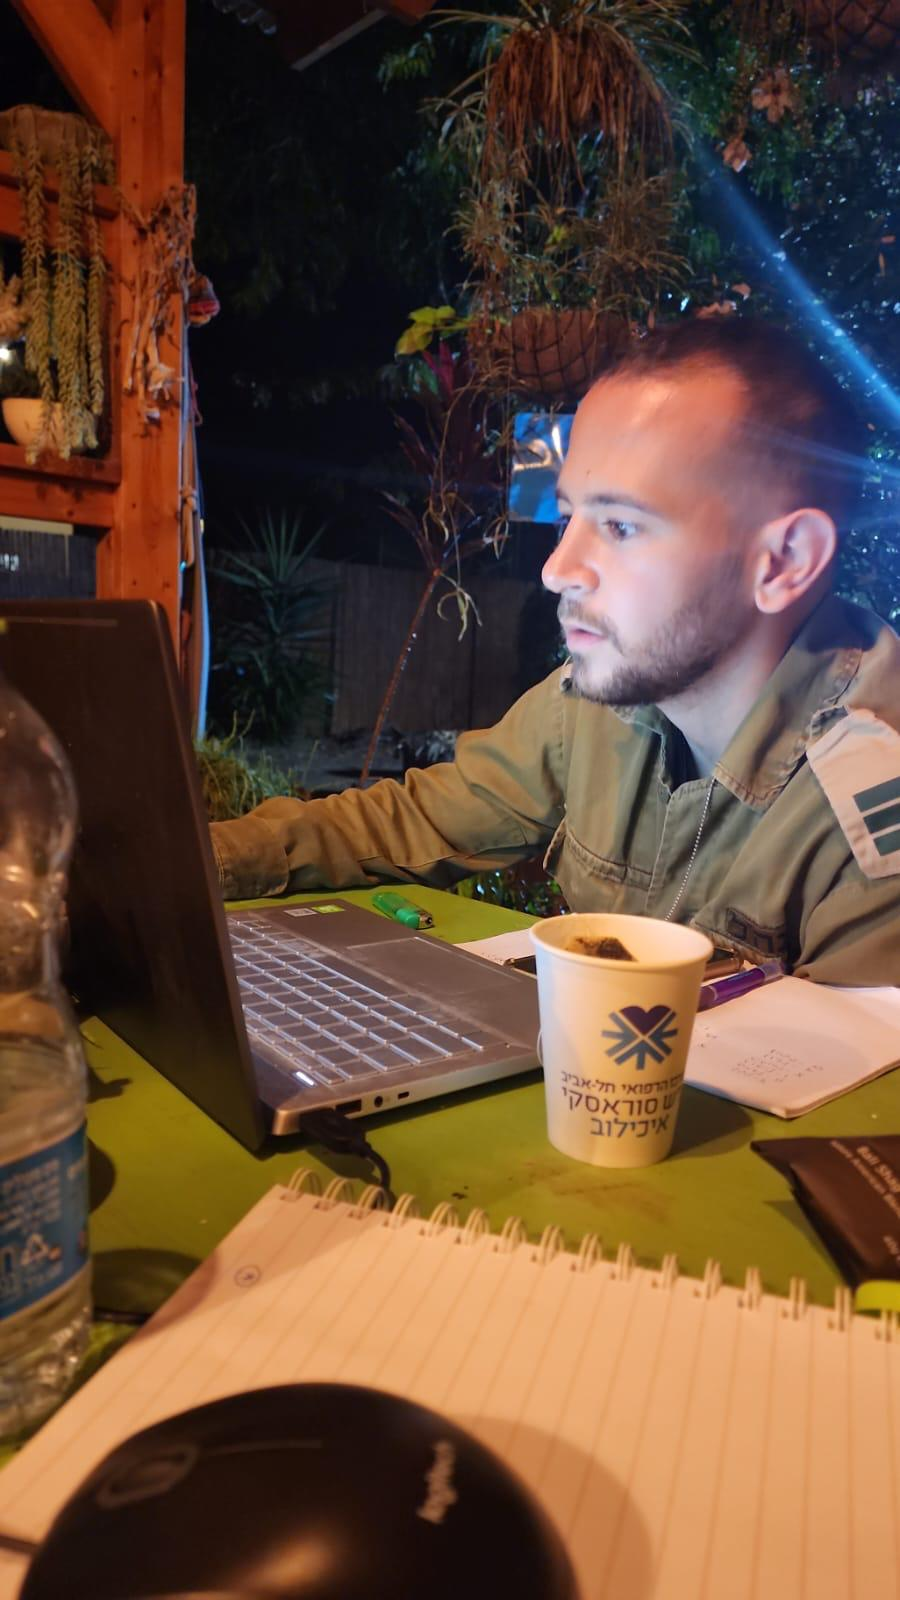

In [34]:
fname = 'omerdata1.csv'
data_df = pd.read_csv(fname, encoding='cp1255')
data_df.head()

,personal_number,rank,last_name,first_name,troop,platooon,role,age,marital_status,children,...,17/01/2024,18/01/2024,19/01/2024,20/01/2024,21/01/2024,22/01/2024,23/01/2024,24/01/2024,25/01/2024,כמות ימי מילואים
0,7069201,"רס""ר",גניזת,עמנואל יונתן אריאל,מ,4,לוחם,41.2,נשוי,8,...,1,1,1,1,1,1.0,1,1.0,1.0,63
1,7448470,"סמ""ר",שחור,אשר,"פלס""מ","תאג""ד",מטפל בכיר,38.7,נשוי,8,...,1,1,1,1,1,1.0,1,1.0,1.0,15
2,6913194,"רס""ר",ליסון,ישראל,"פלס""מ",קשר,קשר,43.8,נשוי,7,...,1,1,1,1,1,1.0,1,1.0,1.0,0
3,4612824,"רס""ם",רלבג,משה,"פלס""מ",רבנות,רב,57.9,נשוי,7,...,1,1,1,1,1,1.0,1,1.0,1.0,0
4,7237023,סרן,אביגד,עמוס אברהם,ל,צלפים,קצין,40.7,נשוי,6,...,1,1,1,1,1,1.0,1,1.0,1.0,22


In [35]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Columns: 128 entries, personal_number to כמות ימי מילואים
dtypes: float64(71), int64(14), object(43)
memory usage: 796.1+ KB


In [36]:
data_df.describe()

,personal_number,age,children,number_of_reserve_days,07/10/2023,08/10/2023,09/10/2023,10/10/2023,11/10/2023,12/10/2023,...,17/01/2024,18/01/2024,19/01/2024,20/01/2024,21/01/2024,22/01/2024,23/01/2024,24/01/2024,25/01/2024,כמות ימי מילואים
count,7.960000e+02,796.000000,796.000000,796.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,...,796.000000,796.000000,796.000000,796.000000,796.000000,795.000000,796.000000,771.000000,767.000000,796.000000
mean,7.607514e+06,29.541168,0.702261,65.422111,0.573436,0.593870,0.614304,0.624521,0.636015,0.634738,...,0.548995,0.548995,0.548995,0.548995,0.547739,0.548428,0.560302,0.543450,0.533246,65.310302
std,1.155819e+06,6.463601,1.342314,47.570989,0.494894,0.491423,0.487070,0.484556,0.481452,0.481811,...,0.497907,0.497907,0.497907,0.497907,0.498029,0.497963,0.496662,0.498432,0.499219,47.568320
min,4.321377e+06,20.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.880658e+06,24.800000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,8.155446e+06,27.900000,0.000000,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,86.000000
75%,8.488503e+06,32.700000,1.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000
max,9.304416e+06,57.900000,8.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000


In [37]:
data_df.isnull().sum()

personal_number      0
rank                46
last_name            0
first_name           0
troop                0
                    ..
22/01/2024           1
23/01/2024           0
24/01/2024          25
25/01/2024          29
כמות ימי מילואים     0
Length: 128, dtype: int64

In [38]:
data_df.columns

Index(['personal_number', 'rank', 'last_name', 'first_name', 'troop',
       'platooon', 'role', 'age', 'marital_status', 'children',
       ...
       '17/01/2024', '18/01/2024', '19/01/2024', '20/01/2024', '21/01/2024',
       '22/01/2024', '23/01/2024', '24/01/2024', '25/01/2024',
       'כמות ימי מילואים'],
      dtype='object', length=128)

In [39]:
data_df['Served'] = data_df['number_of_reserve_days'].apply(lambda x: 1 if x > 1 else 0)

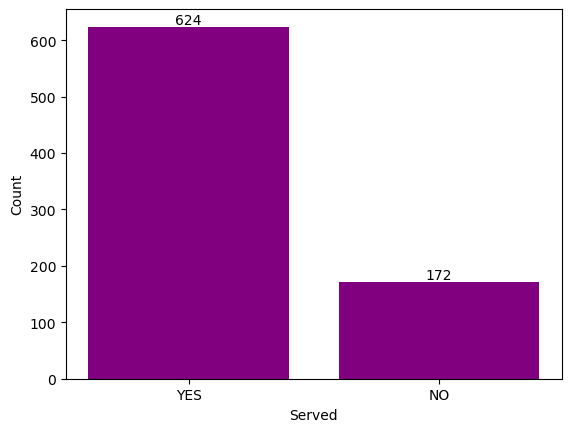

In [40]:
data_df['Served'] = data_df['Served'].replace({1: 'YES', 0: 'NO'})
value_counts = data_df['Served'].value_counts()
plt.bar(value_counts.index, value_counts, color='purple')
plt.xlabel('Served')
plt.ylabel('Count')
for index, value in enumerate(value_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


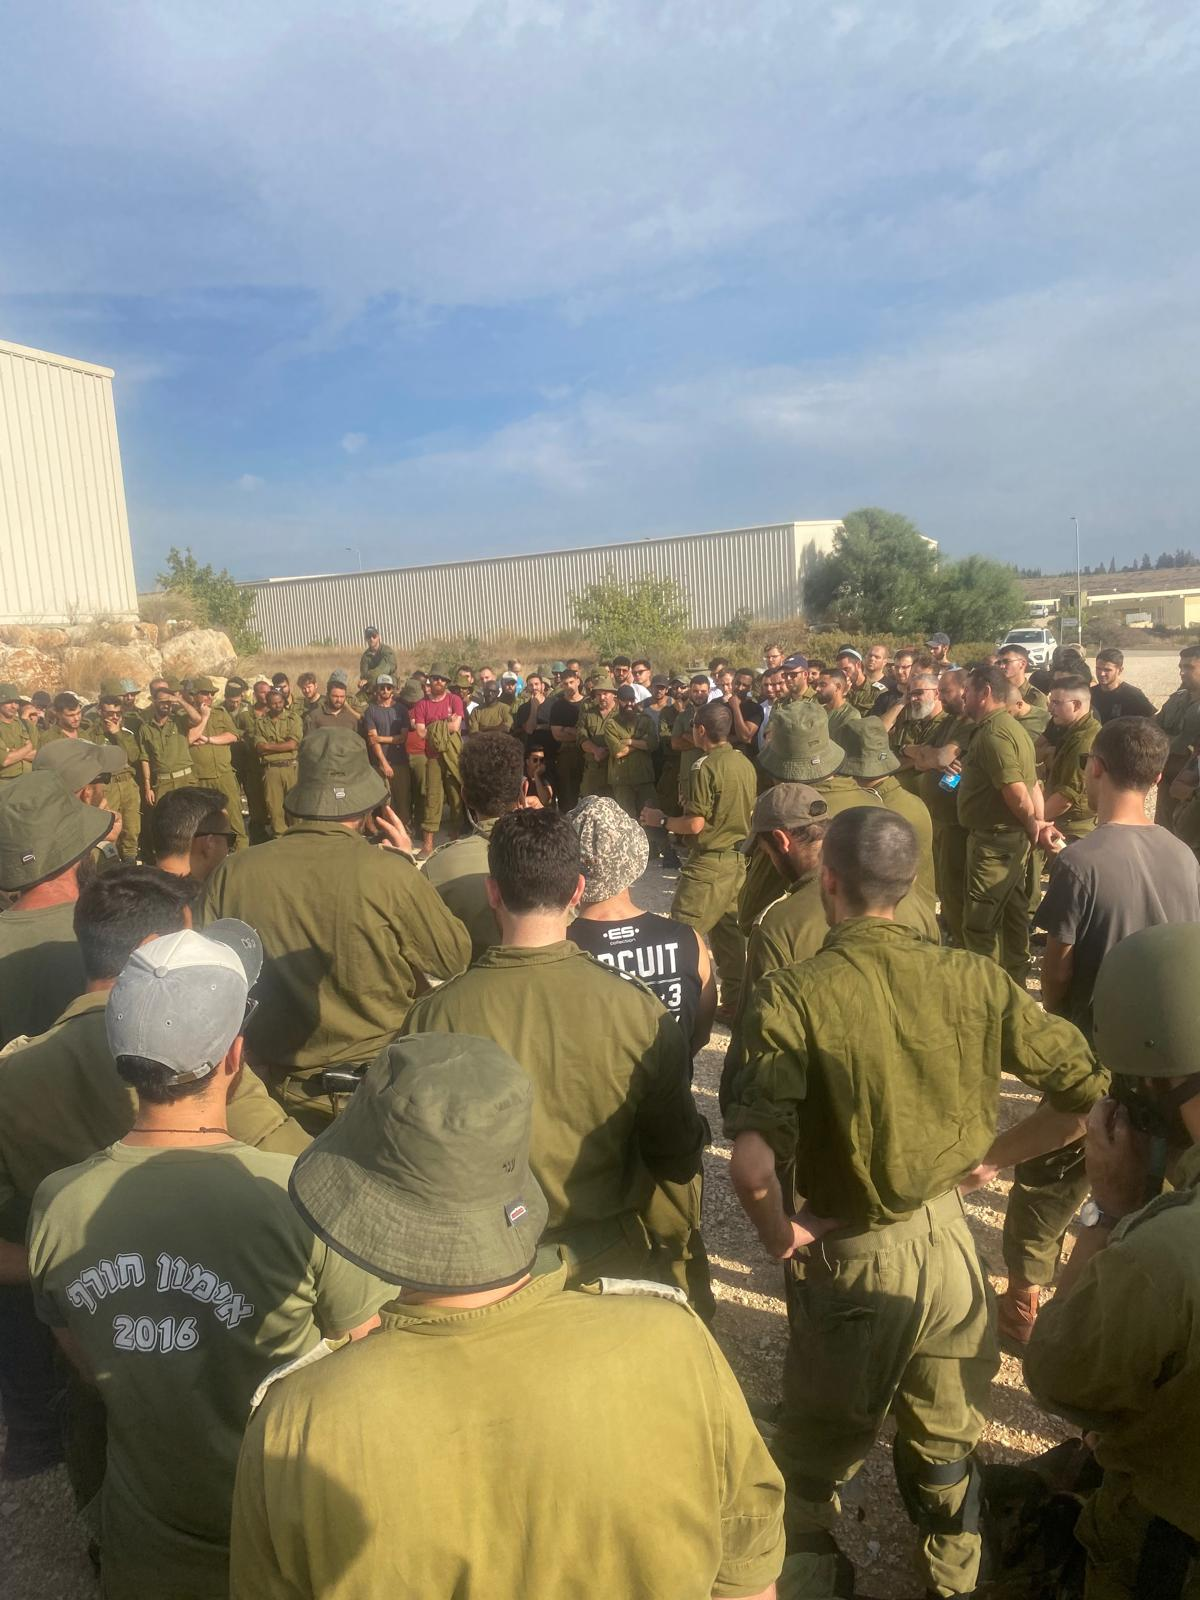

In [41]:
data_df['area'].value_counts()

area
מרכז              295
דרום              155
צפון              141
הרי יהודה          76
שרון               62
איוש-גוש עציון     57
ערבה               10
Name: count, dtype: int64

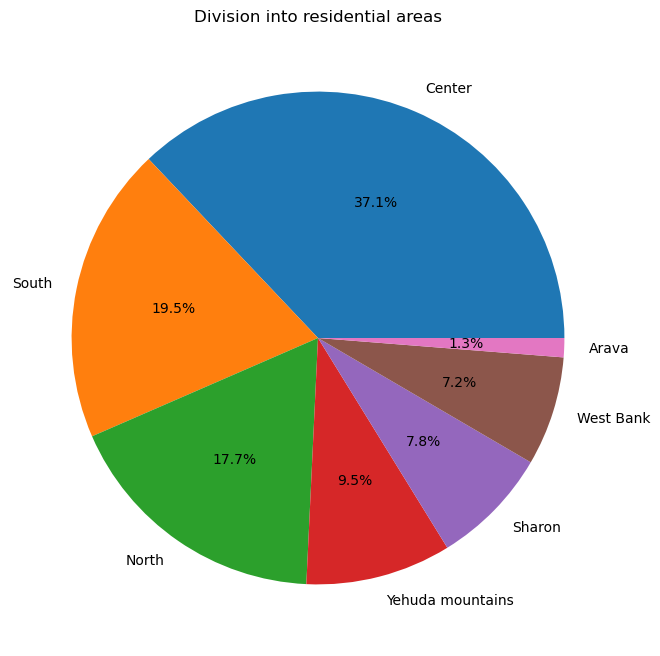

In [42]:
plt.figure(figsize=(8, 8))
pie = plt.pie(data_df['area'].value_counts(), autopct='%1.1f%%')
new_labels = ['Center', 'South', 'North', 'Yehuda mountains', 'Sharon', 'West Bank', 'Arava']
for text, new_label in zip(pie[1], new_labels):
    text.set_text(new_label)
plt.title('Division into residential areas')
plt.show()


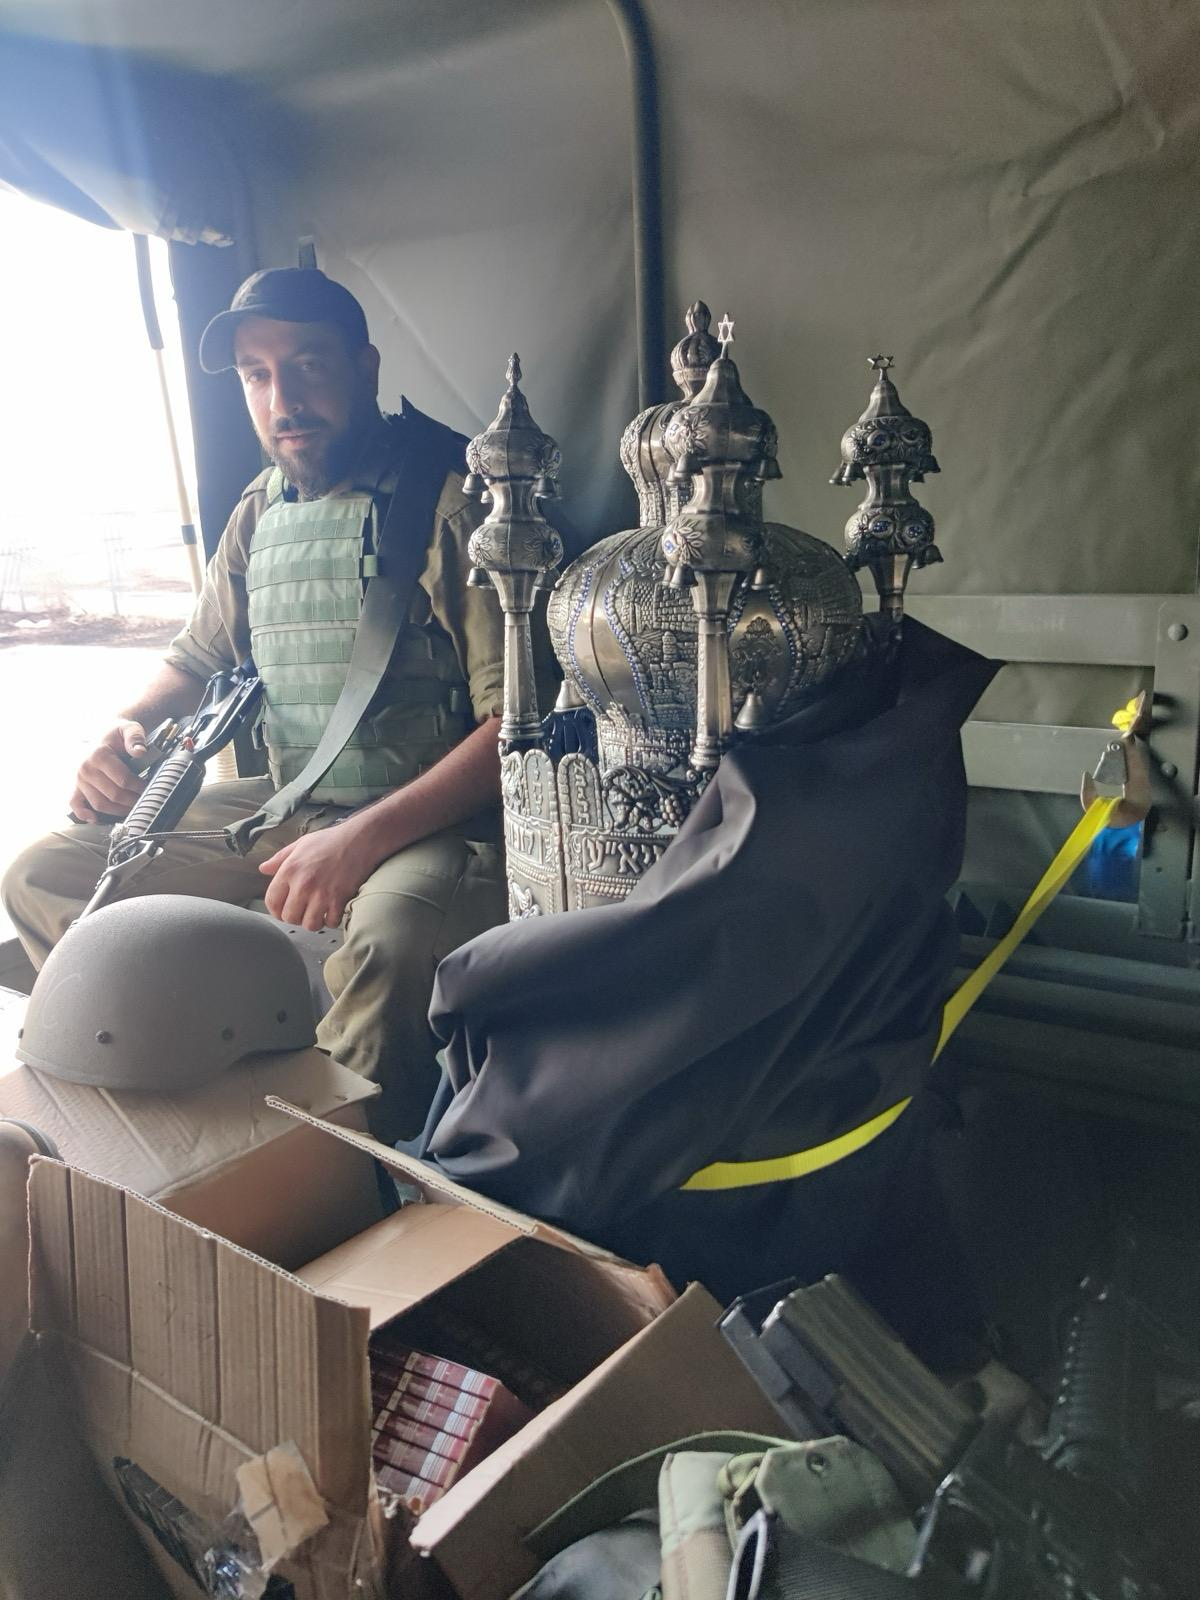

In [43]:
datayes = data_df[data_df['Served'] == 'YES'].copy()

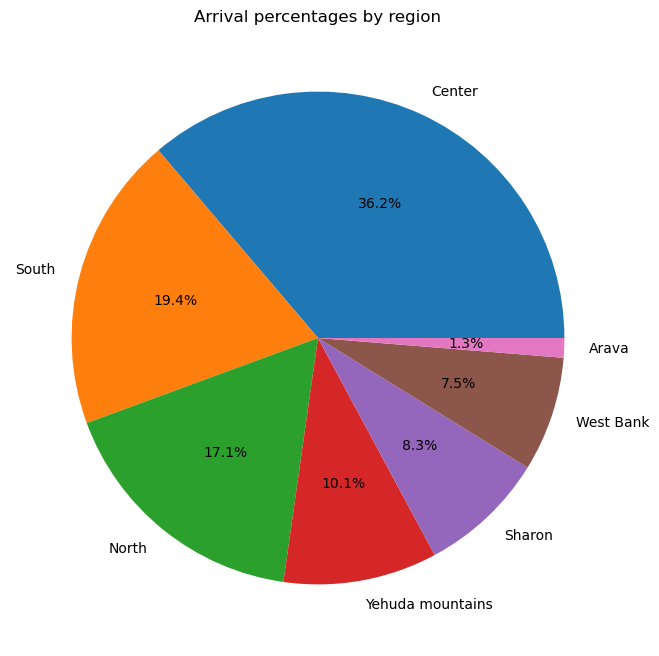

In [44]:
plt.figure(figsize=(8, 8))
pie = plt.pie(datayes['area'].value_counts(), autopct='%1.1f%%')
new_labels = ['Center', 'South', 'North', 'Yehuda mountains', 'Sharon', 'West Bank', 'Arava']
for text, new_label in zip(pie[1], new_labels):
    text.set_text(new_label)
plt.title('Arrival percentages by region')
plt.show()

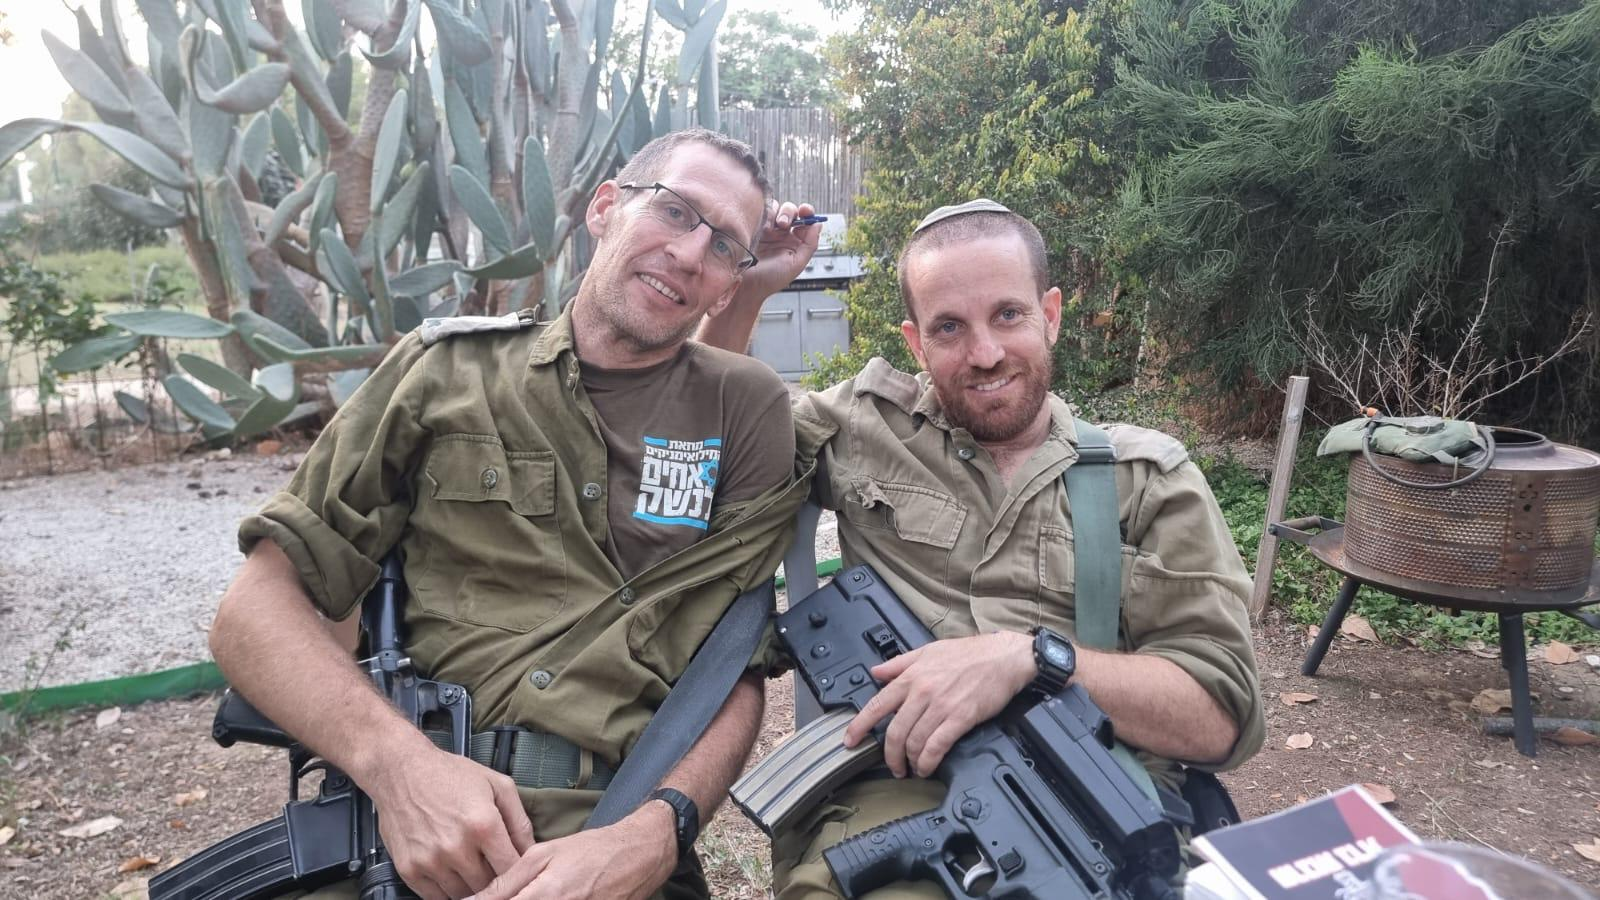

### conclusion

When I accessed the data, I thought that the percentages of enlistment in areas like Judea and Samaria would be higher than in the central region, as is the well-known social stigma. On the other hand, after researching the data and filtering, according to who actually enlisted in the reserves, from each region, we can see that the differences are almost zero to the point of non-existence, and from this we can conclude that the Israeli population reported to the reserves with similar reporting percentages without regional differences

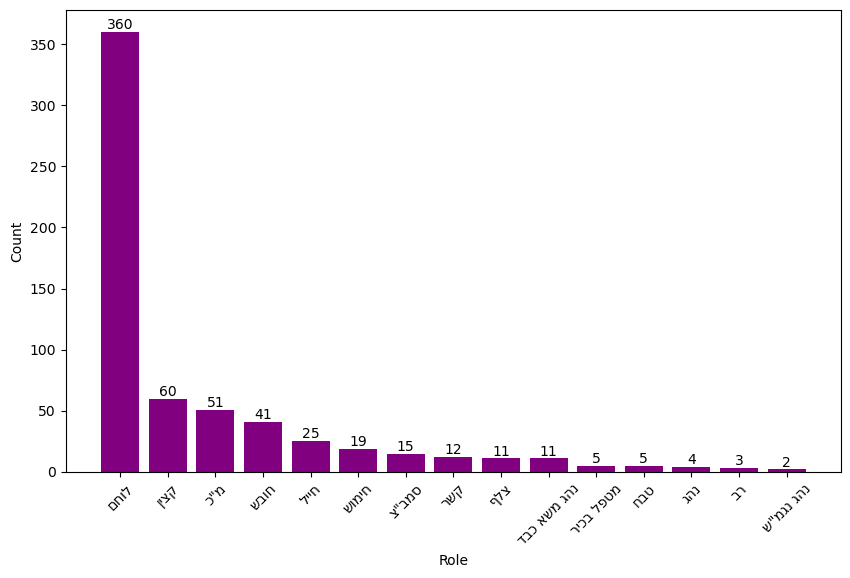

In [45]:
role_replacements = {
    'לוחם': 'םחול',
    'קצין': 'ןיצק',
    'מ"כ': 'כ"מ',
    'חובש': 'שבוח',
    'חייל': 'לייח',
    'חימוש': 'שומיח',
    'סמב"צ': 'צ"במס',
    'קשר': 'רשק',
    'צלף': 'ףלצ',
    'נהג משא כבד': 'דבכ אשמ גהנ',
    'טבח': 'חבט',
    'מטפל בכיר': 'ריכב לפטמ',
    'נהג': 'גהנ',
    'רב': 'בר',
    'נהג נגמ"ש': 'ש"מגנ גהנ'
}


datayes_lab=datayes.copy()

datayes_lab['role'] = datayes['role'].replace(role_replacements)


plt.figure(figsize=(10, 6))



role_counts = datayes_lab['role'].value_counts()

plt.bar(role_counts.index, role_counts.values, color='purple')
plt.xlabel('Role')
plt.ylabel('Count')


for index, value in enumerate(role_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


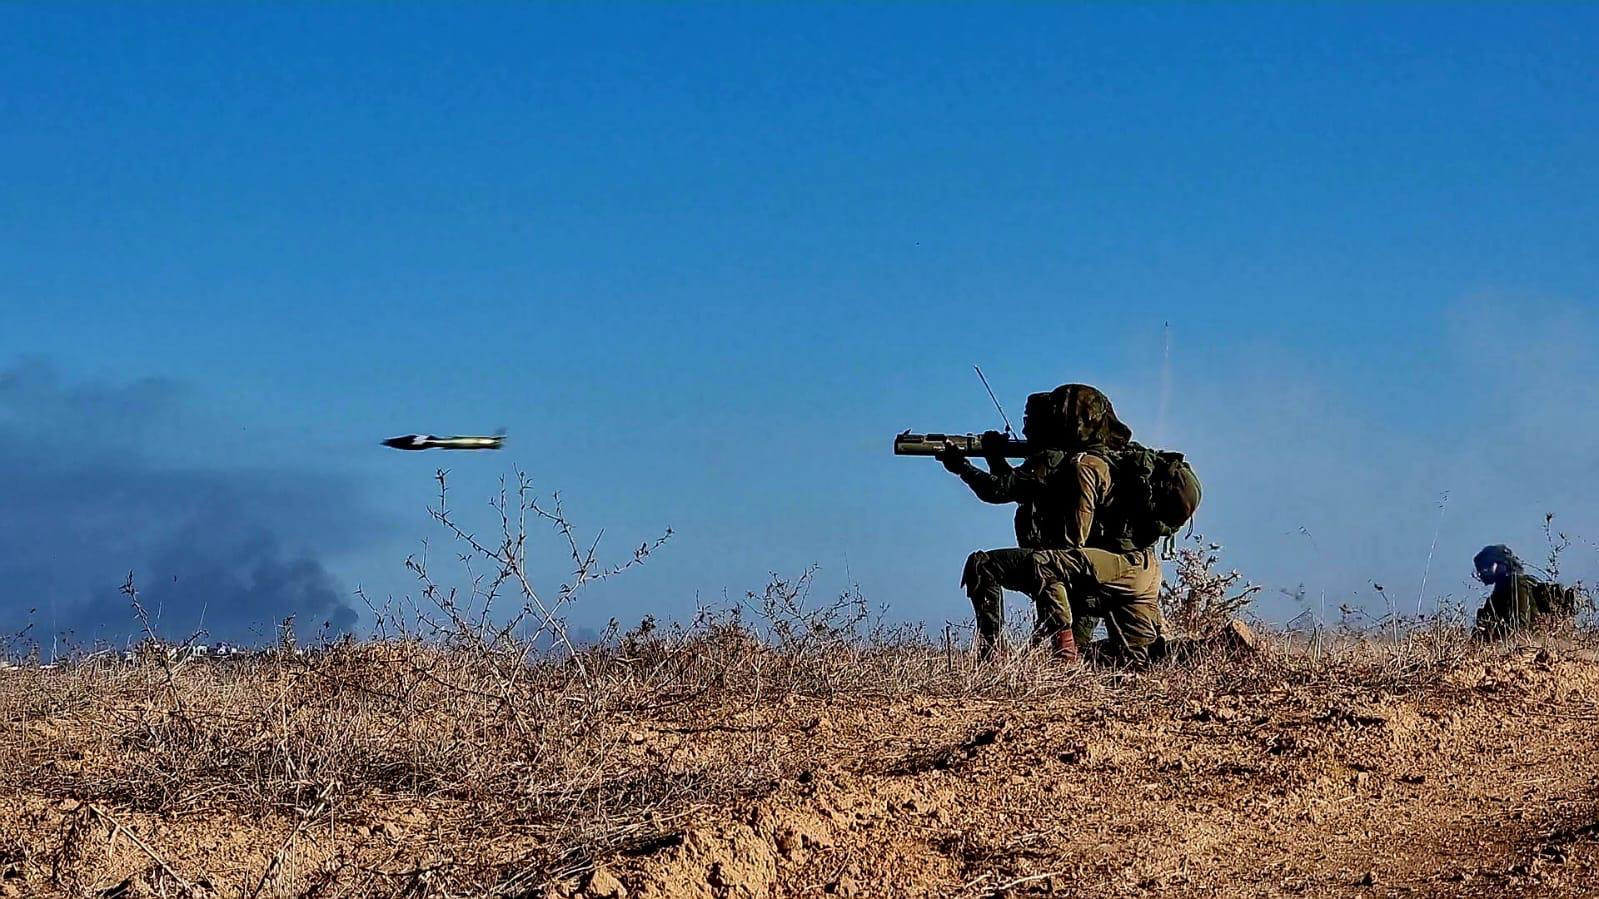

### Analysis by age

C:\Users\zivke\AppData\Local\Temp\ipykernel_6164\3917623391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  served_df['age_group'] = pd.cut(served_df['age'], bins=bins, labels=labels)


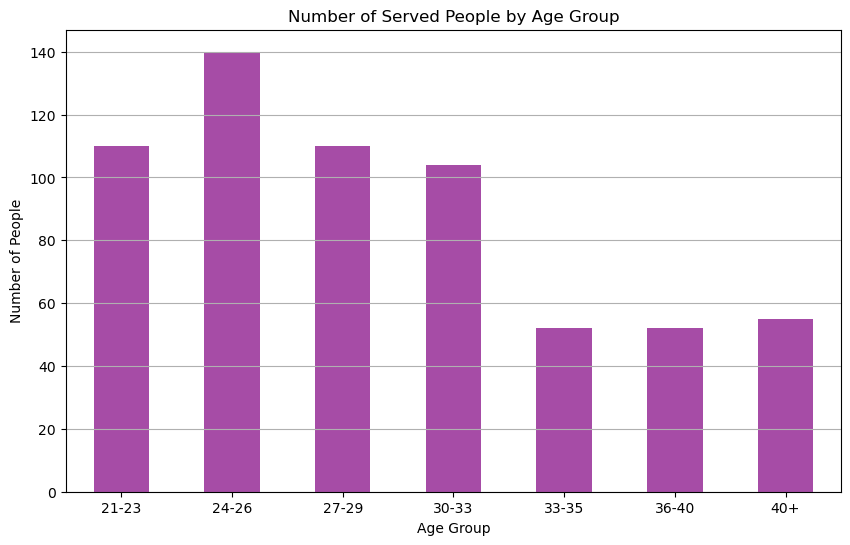

In [46]:
served_df = data_df[data_df['Served'] == 'YES']
bins = [21, 24, 27, 30, 33, 36, 40, 100]
labels = ['21-23', '24-26', '27-29', '30-33', '33-35', '36-40', '40+']
served_df['age_group'] = pd.cut(served_df['age'], bins=bins, labels=labels)
age_group_counts = served_df['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Number of Served People by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

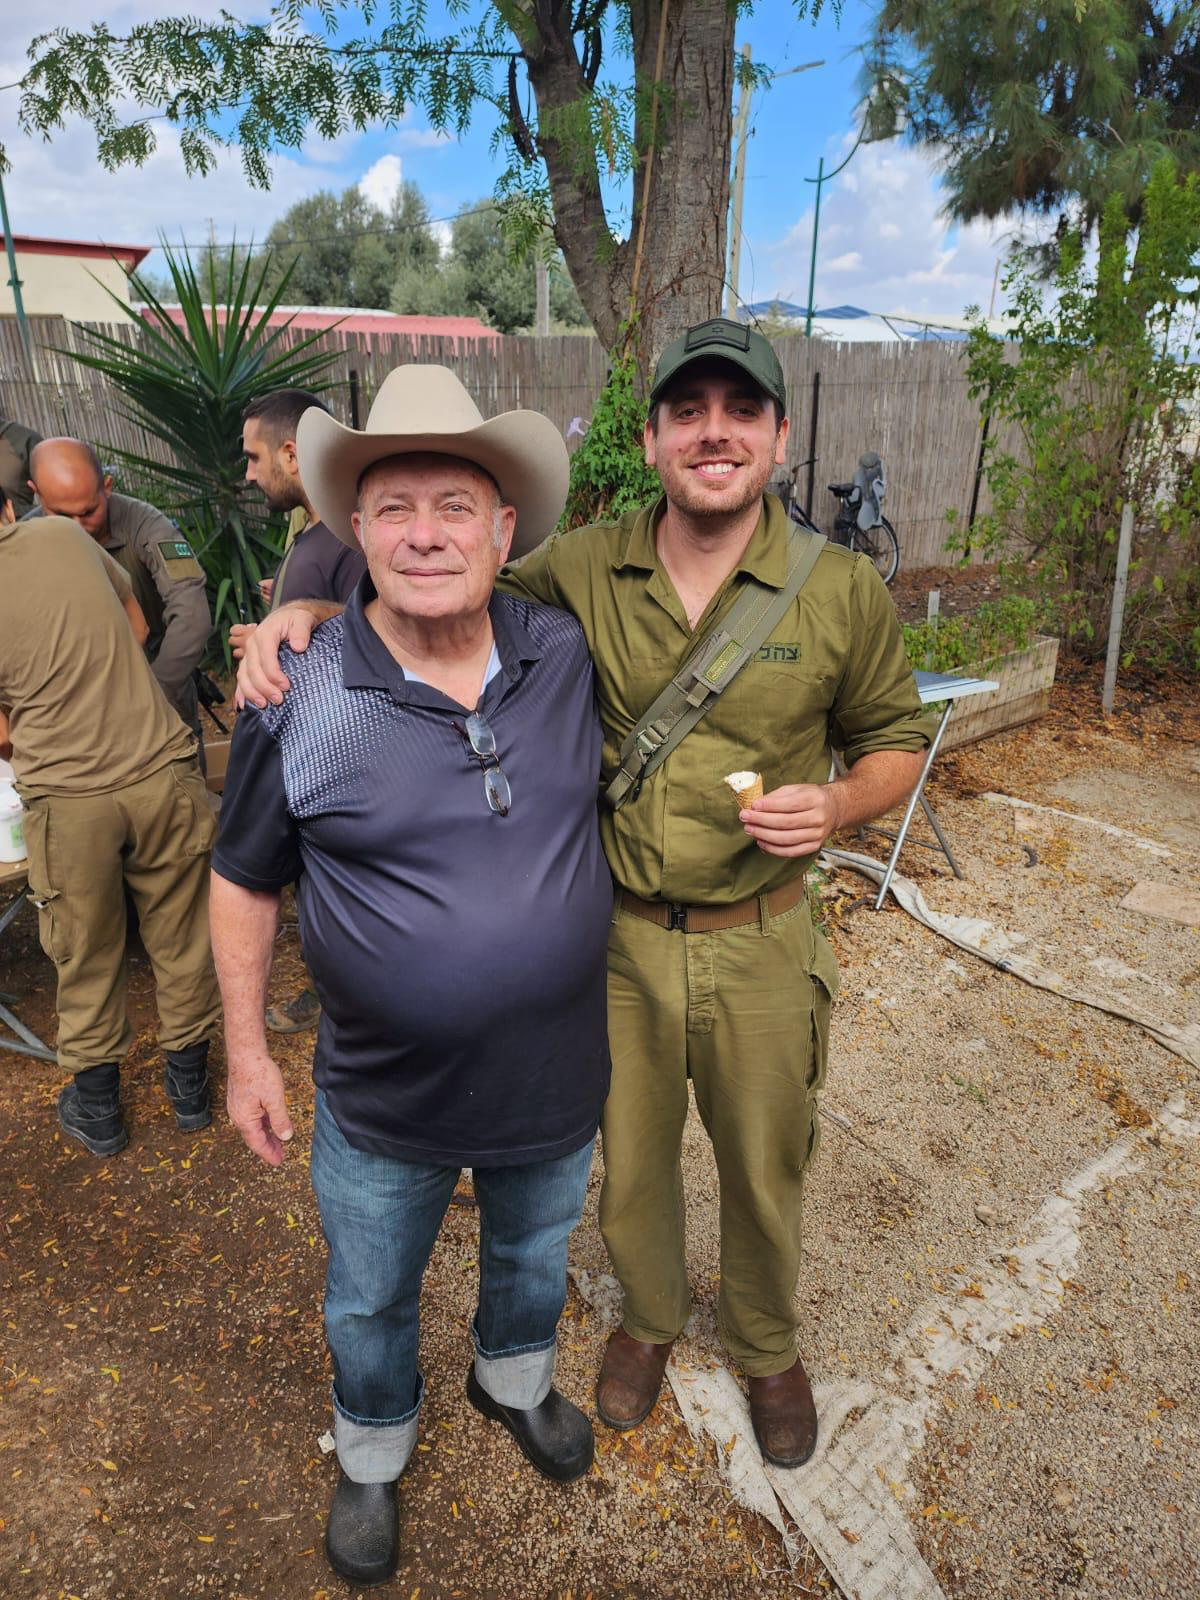

# Conclusion

According to the data analysis, it seems that the most effective age at which the reservists reach is 24-26.
At a younger age you can see that there are less because they are on a trip or abroad, and also want freedom.
It can be seen that from the age of 30 there is a significant decrease in arrival because they are less qualified, married.
At the age of 40 and over, it is expected that there will be a large decrease, but the numbers are similar to the 30-year-olds.

### Analysis by marital status

In [47]:
single_count = data_df[data_df['marital_status'] == 'רווק']['marital_status'].count()
married_count = data_df[data_df['marital_status'] == 'נשוי']['marital_status'].count()
divorced_count = data_df[data_df['marital_status'] == 'גרוש']['marital_status'].count()
print("Number of Singles:", single_count)
print("Number of Married:", married_count)
print("Number of Divorced:", divorced_count)


Number of Singles: 528
Number of Married: 258
Number of Divorced: 10


In [48]:

served_single_count = data_df[(data_df['marital_status'] == 'רווק') & (data_df['Served'] == 'YES')]['marital_status'].count()
served_married_count = data_df[(data_df['marital_status'] == 'נשוי') & (data_df['Served'] == 'YES')]['marital_status'].count()
served_divorced_count = data_df[(data_df['marital_status'] == 'גרוש') & (data_df['Served'] == 'YES')]['marital_status'].count()
print("Number of Served Singles:", served_single_count)
print("Number of Served Married:", served_married_count)
print("Number of Served Divorced:", served_divorced_count)


Number of Served Singles: 398
Number of Served Married: 216
Number of Served Divorced: 10


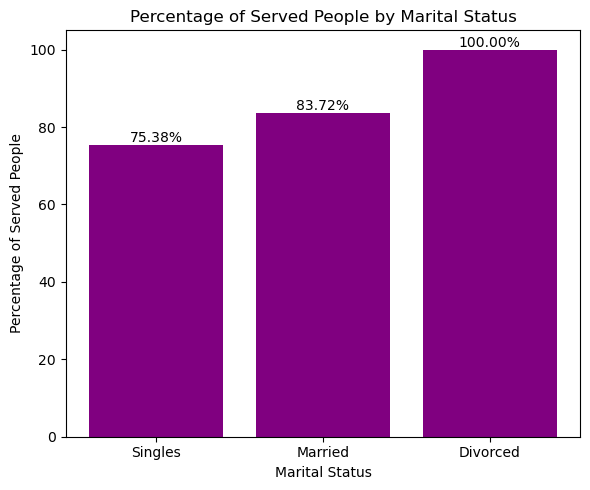

In [49]:
served_single_count = data_df[(data_df['marital_status'] == 'רווק') & (data_df['Served'] == 'YES')]['marital_status'].count()
served_married_count = data_df[(data_df['marital_status'] == 'נשוי') & (data_df['Served'] == 'YES')]['marital_status'].count()
served_divorced_count = data_df[(data_df['marital_status'] == 'גרוש') & (data_df['Served'] == 'YES')]['marital_status'].count()
single_count = data_df[data_df['marital_status'] == 'רווק']['marital_status'].count()
married_count = data_df[data_df['marital_status'] == 'נשוי']['marital_status'].count()
divorced_count = data_df[data_df['marital_status'] == 'גרוש']['marital_status'].count()
served_single_percentage = (served_single_count / single_count) * 100
served_married_percentage = (served_married_count / married_count) * 100
served_divorced_percentage = (served_divorced_count / divorced_count) * 100
labels = ['Singles', 'Married', 'Divorced']
served_percentages = [served_single_percentage, served_married_percentage, served_divorced_percentage]
x = range(len(labels))
plt.figure(figsize=(6, 5))
bars = plt.bar(x, served_percentages, color='purple')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Served People')
plt.title('Percentage of Served People by Marital Status')
plt.xticks(x, labels)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


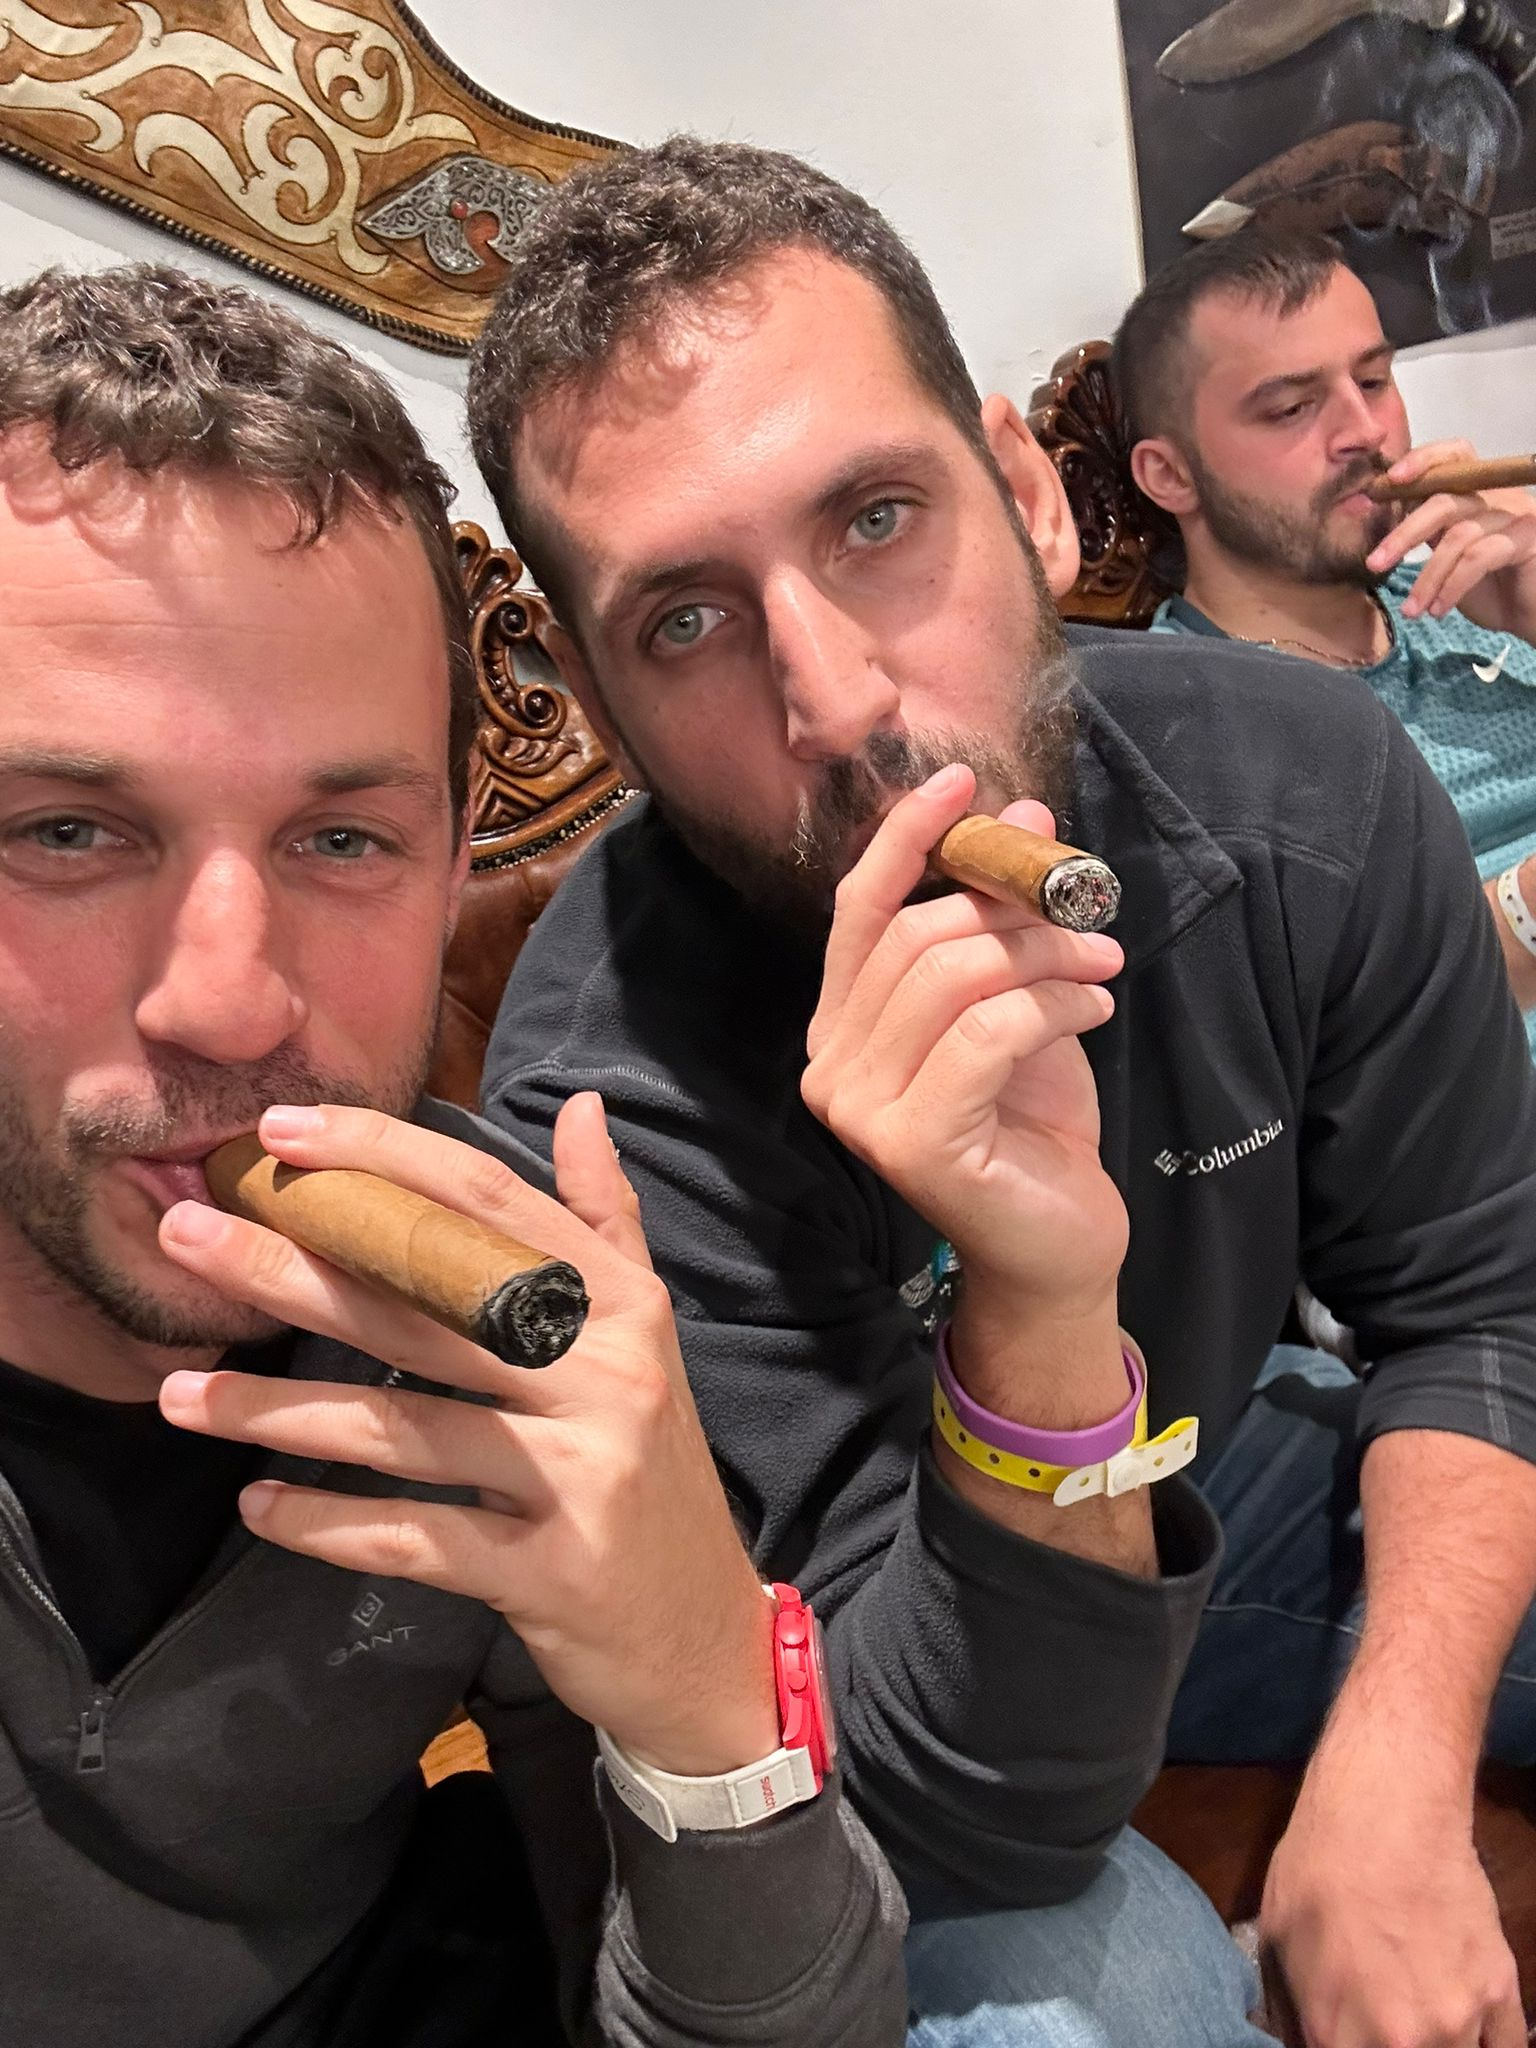

# Conclusion

Before analyzing the data, I was sure that singles enlist in higher percentages for reserve service. After investigating the data, it can be seen that the married enlist in higher percentages. I can assume that they want more freedom from the wife and children. In addition, these are mature people with a sense of responsibility for the country and the security of the residents.Emotional and social support: Partnership provides emotional and social support, serving as a means to cope with difficulties and reduce levels of distress and loneliness. Therefore, married individuals may be more prepared to face the challenges of military service.  Divorced individuals may experience less familial support compared to married or single individuals, leading them to seek self-restoration or self-empowerment through military service.
Opportunities for Advancement: Military service may offer divorced individuals opportunities to shape their life trajectories, acquire new skills, or receive professional training, potentially improving their overall well-being.
Community Integration: Social engagement and community involvement within the military framework could be pivotal for divorced individuals who feel alienated or marginalized in their communities.

In [50]:
average_reserve_days_by_children = served_df.groupby('children')['number_of_reserve_days'].mean()

print("Average Reserve Days by Number of Children:")
print(average_reserve_days_by_children)


Average Reserve Days by Number of Children:
children
0     81.614679
1     89.279070
2     80.967213
3     84.581395
4     97.793103
5     97.285714
6    111.000000
7    111.000000
8    111.000000
Name: number_of_reserve_days, dtype: float64


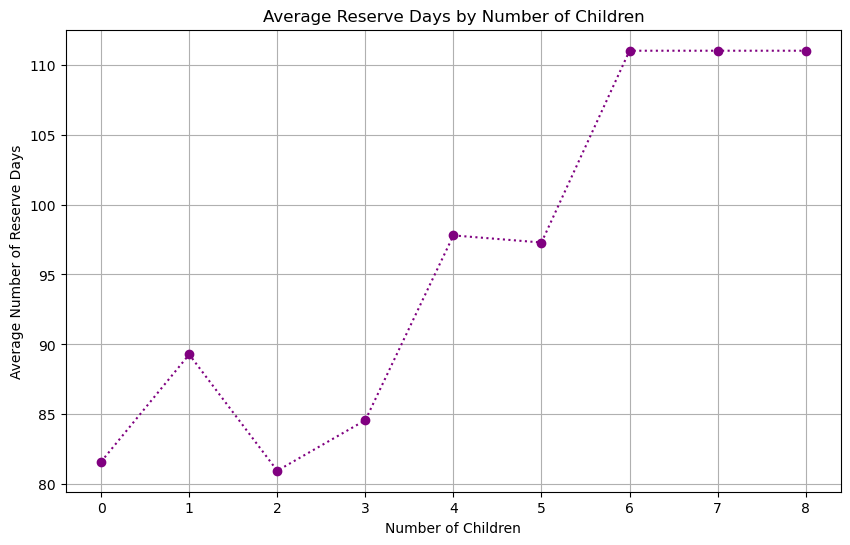

In [51]:
average_reserve_days_by_children = served_df.groupby('children')['number_of_reserve_days'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_reserve_days_by_children.index, average_reserve_days_by_children.values, marker='o', color='purple', linestyle=':')
plt.title('Average Reserve Days by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Number of Reserve Days')
plt.grid(True)
plt.show()


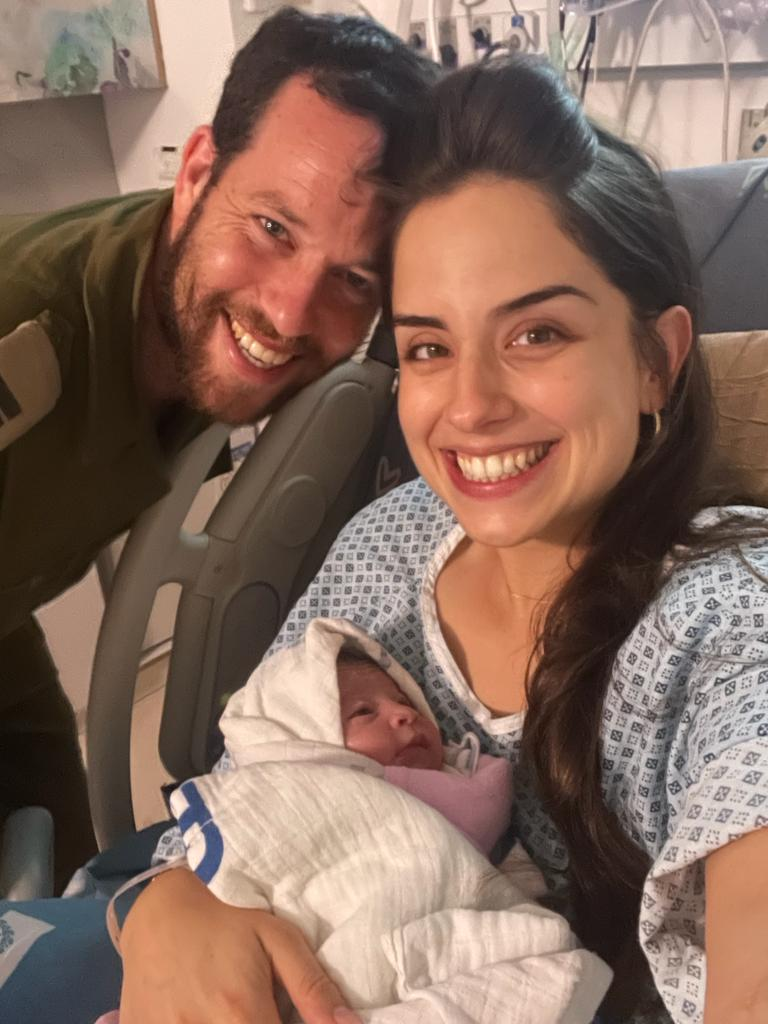

# Conclusion

Contrary to the common assumption that the more children there are, the less people do reserve days, we see that the actual situation is actually different, it could be that it is more difficult at home with lots of children and the reserve is a vacation, and it could be that it is the sense of responsibility and the greater desire to convey an educational message to the children and try to give them a country safer.

In [52]:
date_list = served_df.columns[16:127]
selected_cols = served_df[date_list].fillna(0)
replacements = {
    'נפקד': 0, "ג'וליס": 0, 'גב"ל': 0, 'ב1': 0, 'אוגדת 1': 0, 'שחרור': 0,
    'נהרג': 0, 'בגמילים': 0, 'חשש נפקד': 0, 'מחנה סבידיה': 0,
    'נשפט ונסגרה נפקדות': 0, 'חזר להשפט': 0, 'גב"ל (ניוד)': 0, 'קיצעות': 0, 'סורוקה': 0
}




selected_cols.replace(replacements, inplace=True)
selected_cols = selected_cols.astype(int)

sums = selected_cols.sum(axis=0).tolist()

print('Amount of days:', len(selected_cols.columns))
selected_cols.head()

Amount of days: 111


,07/10/2023,08/10/2023,09/10/2023,10/10/2023,11/10/2023,12/10/2023,13/10/2023,14/10/2023,15/10/2023,16/10/2023,...,16/01/2024,17/01/2024,18/01/2024,19/01/2024,20/01/2024,21/01/2024,22/01/2024,23/01/2024,24/01/2024,25/01/2024
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


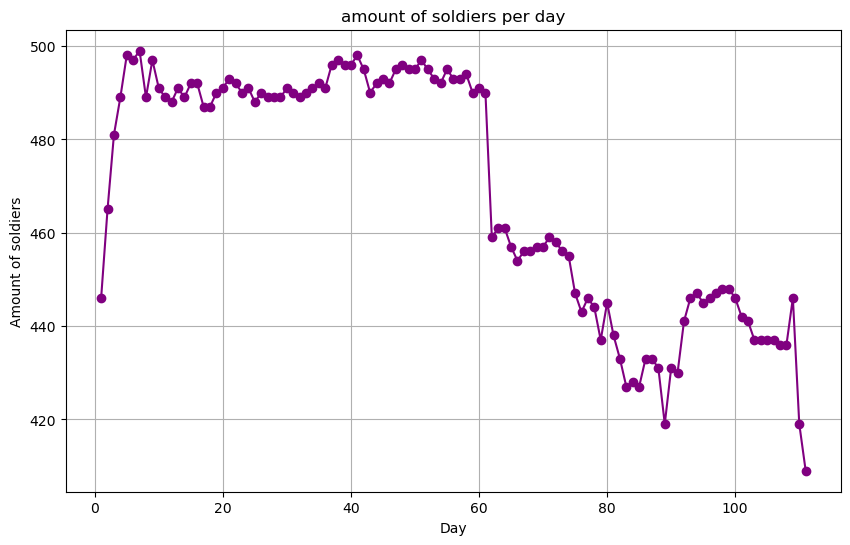

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sums)+1), sums, marker='o', color='purple', linestyle='-')
plt.title('amount of soldiers per day')
plt.xlabel('Day')
plt.ylabel('Amount of soldiers')
plt.grid(True)
plt.show()

In [54]:
columns_to_remove = list(selected_cols.columns)
additional_columns_to_remove = ['personal_number', 'last_name', 'first_name','frame',' driving_license','profession','address','platooon','כמות ימי מילואים','troop','role','rank']
columns_to_remove.extend(additional_columns_to_remove)
mdata = data_df.drop(columns=columns_to_remove)

mdata.head()

,age,marital_status,children,area,number_of_reserve_days,Served
0,41.2,נשוי,8,הרי יהודה,111,YES
1,38.7,נשוי,8,הרי יהודה,111,YES
2,43.8,נשוי,7,איוש-גוש עציון,111,YES
3,57.9,נשוי,7,צפון,111,YES
4,40.7,נשוי,6,דרום,111,YES


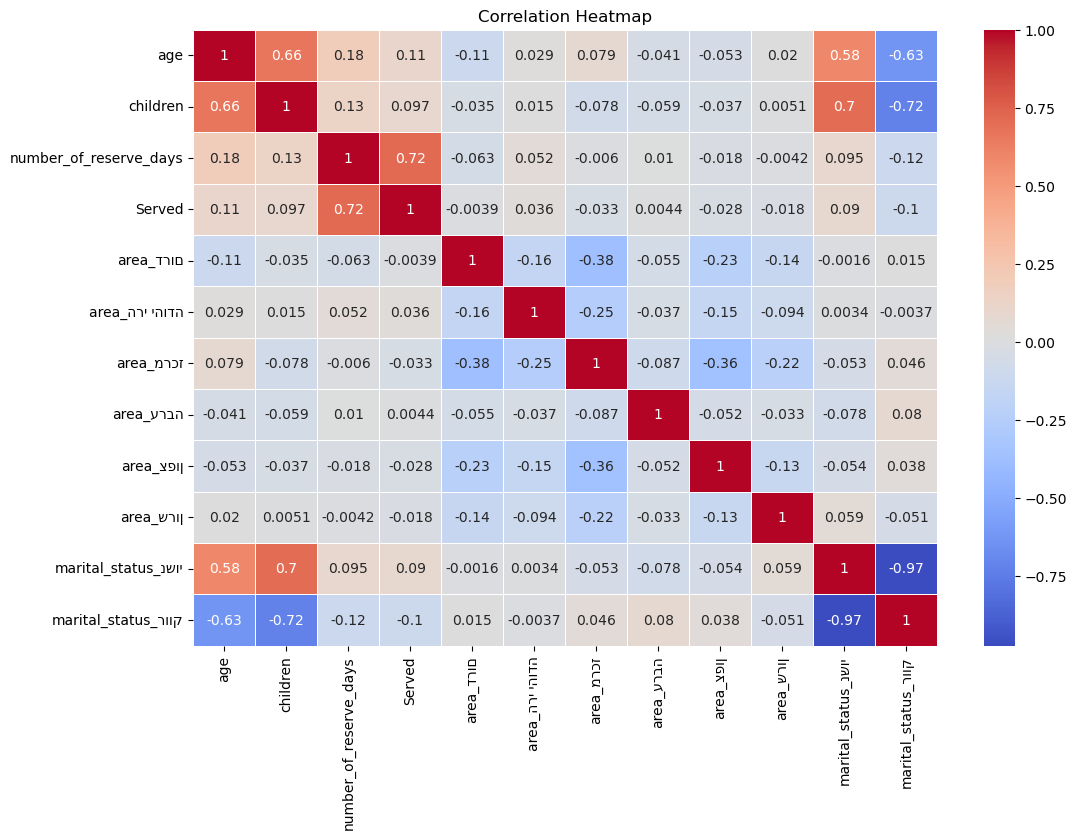

In [55]:
mdata_encoded = pd.get_dummies(mdata, columns=['area','marital_status'], drop_first=True)

mdata_encoded['Served'] = mdata_encoded['Served'].map({'YES': 1, 'NO': 0})

numerical_cols = mdata_encoded.columns

corr_matrix = mdata_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
high_corr = corr_matrix[(corr_matrix >= 0.6) | (corr_matrix <= -0.6)]


filtered_corr = high_corr[high_corr != 1.0]

for col in filtered_corr.columns:
    for row in filtered_corr.index:
        value = filtered_corr.loc[row, col]
        if pd.notna(value):
            print(f"{row} and {col} have a correlation of {value:.2f}\n")

children and age have a correlation of 0.66

marital_status_רווק and age have a correlation of -0.63

age and children have a correlation of 0.66

marital_status_נשוי and children have a correlation of 0.70

marital_status_רווק and children have a correlation of -0.72

Served and number_of_reserve_days have a correlation of 0.72

number_of_reserve_days and Served have a correlation of 0.72

children and marital_status_נשוי have a correlation of 0.70

marital_status_רווק and marital_status_נשוי have a correlation of -0.97

age and marital_status_רווק have a correlation of -0.63

children and marital_status_רווק have a correlation of -0.72

marital_status_נשוי and marital_status_רווק have a correlation of -0.97



In [57]:
arr = ['area_דרום','area_הרי יהודה','area_מרכז','area_ערבה','area_צפון','area_שרון']

mdata_encoded=mdata_encoded.drop(columns=arr)

bins = [0, 40,80, 115, float('inf')]
labels = ['0-40', '41-80', '81-115','115+']


mdata_encoded['reserve_days_range'] = pd.cut(mdata_encoded['number_of_reserve_days'], bins=bins, labels=labels, right=False)


mdata_encoded.head()

,age,children,number_of_reserve_days,Served,marital_status_נשוי,marital_status_רווק,reserve_days_range
0,41.2,8,111,1,True,False,81-115
1,38.7,8,111,1,True,False,81-115
2,43.8,7,111,1,True,False,81-115
3,57.9,7,111,1,True,False,81-115
4,40.7,6,111,1,True,False,81-115


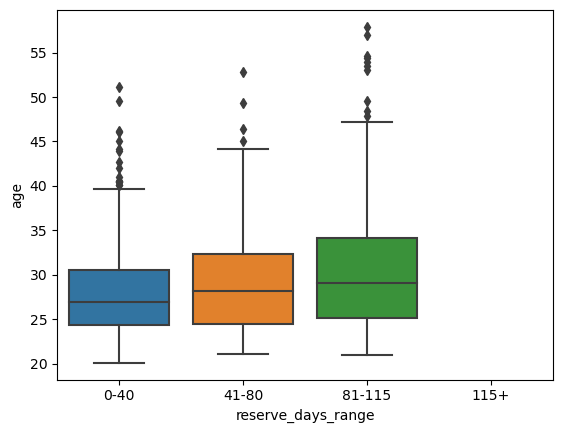

In [58]:
sns.boxplot(x='reserve_days_range', y='age', data=mdata_encoded)
plt.show()

In [60]:
X = mdata_encoded.drop(columns=['number_of_reserve_days', 'reserve_days_range'])
y = mdata_encoded['reserve_days_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

        0-40       0.69      0.62      0.65        56
       41-80       0.20      0.10      0.13        10
      81-115       0.76      0.84      0.80        94

    accuracy                           0.72       160
   macro avg       0.55      0.52      0.53       160
weighted avg       0.70      0.72      0.71       160



## Thank you !

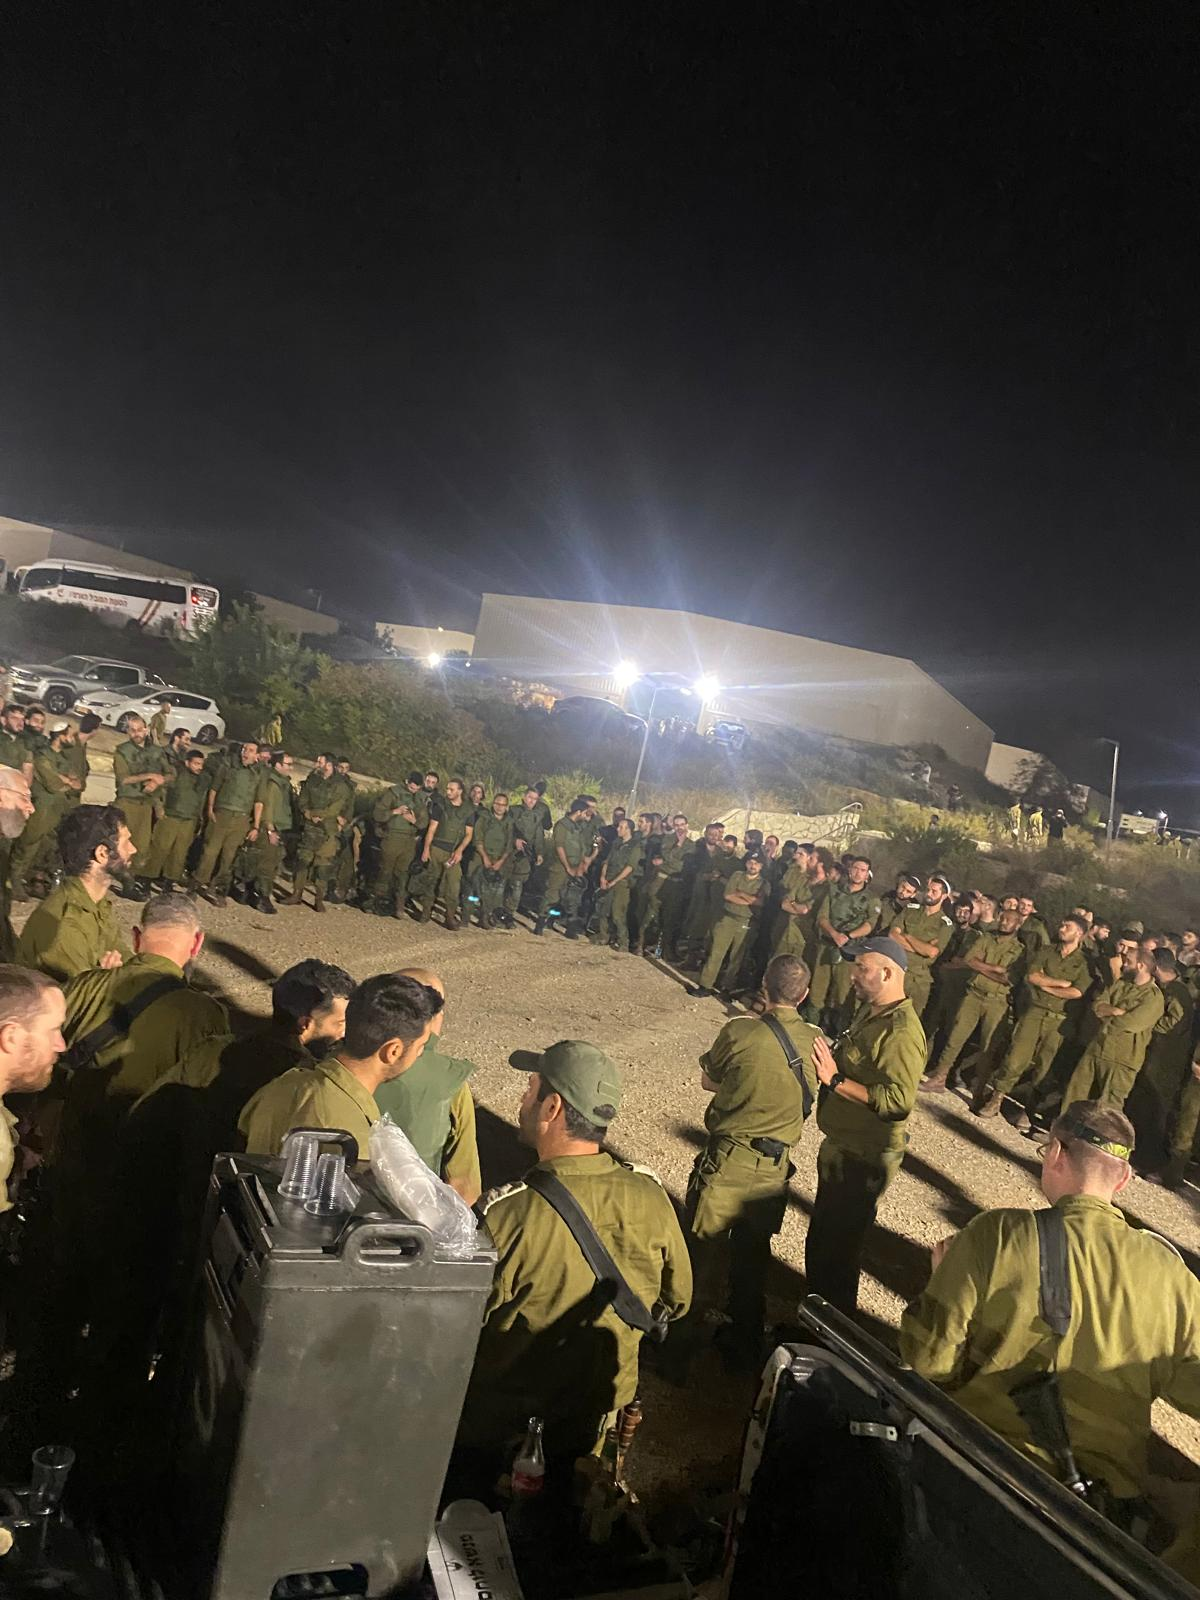